In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta

In [2]:
start_date = "2024-06-01"
end_date = "2025-01-31"

In [3]:
import yfinance as yf

In [4]:
data = yf.download("MSTR", start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
data

Price,Close,High,Low,Open,Volume
Ticker,MSTR,MSTR,MSTR,MSTR,MSTR
Date,,,,,
2024-06-03,162.740997,165.600006,156.042007,160.100006,11222000
2024-06-04,163.876999,169.699997,161.500000,161.742004,13230000
2024-06-05,169.468994,171.783997,163.623993,167.500000,10956000
2024-06-06,165.662994,173.470001,164.705002,169.858994,11623000
2024-06-07,159.619995,171.770004,158.500000,167.102005,12627000
...,...,...,...,...,...
2025-01-24,353.670013,378.109985,351.000000,377.670013,22943800
2025-01-27,347.920013,356.880005,322.299988,340.500000,21224400


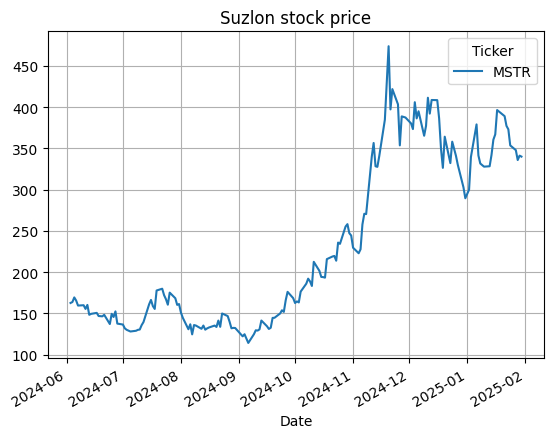

In [6]:
close = data['Close']
ax = close.plot(title = 'Suzlon stock price')
ax.set_xlabel = ('Date')
ax.set_ylabel = ['close price']
ax.grid()
plt.show()

In [7]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,MSTR,MSTR,MSTR,MSTR,MSTR
Date,,,,,
2024-06-03,162.740997,165.600006,156.042007,160.100006,11222000
2024-06-04,163.876999,169.699997,161.500000,161.742004,13230000
2024-06-05,169.468994,171.783997,163.623993,167.500000,10956000
2024-06-06,165.662994,173.470001,164.705002,169.858994,11623000
2024-06-07,159.619995,171.770004,158.500000,167.102005,12627000


In [8]:
# Assuming you want to reset the index to a simple numerical index
data = data.reset_index(drop=True)

In [9]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,MSTR,MSTR,MSTR,MSTR,MSTR
0,162.740997,165.600006,156.042007,160.100006,11222000
1,163.876999,169.699997,161.500000,161.742004,13230000
2,169.468994,171.783997,163.623993,167.500000,10956000
3,165.662994,173.470001,164.705002,169.858994,11623000
4,159.619995,171.770004,158.500000,167.102005,12627000


In [10]:
df_cleaned = data.drop(index=0)


In [11]:
df_cleaned

Price,Close,High,Low,Open,Volume
Ticker,MSTR,MSTR,MSTR,MSTR,MSTR
1,163.876999,169.699997,161.500000,161.742004,13230000
2,169.468994,171.783997,163.623993,167.500000,10956000
3,165.662994,173.470001,164.705002,169.858994,11623000
4,159.619995,171.770004,158.500000,167.102005,12627000
5,159.992004,164.776001,156.029007,157.501007,7265000
...,...,...,...,...,...
161,353.670013,378.109985,351.000000,377.670013,22943800
162,347.920013,356.880005,322.299988,340.500000,21224400
163,335.929993,348.920013,333.089996,344.679993,11461400


In [12]:
# Instead of using filter, select the 'Close' column using bracket notation
data = data[['Close']]
dataset = data.values

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_training = scaler.fit_transform(dataset)

In [14]:
x_train = []
y_train = []

for i in range(10, data_training.shape[0]):
  x_train.append(data_training[i-10:i])
  y_train.append(data_training[i,0])


In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
histoty_model_lstm = model.fit(x_train, y_train, epochs = 100, batch_size=8, verbose = 1, shuffle = False, callbacks=[early_stop])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0112
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0327
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0130
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0130
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0117
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0096
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0101
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0080
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0083
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0069
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0069
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0059
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0061
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - lo

In [18]:
test_data = data_training[-10:]  # Take the last 50 data points for testing

x_test = []
y_test = dataset[data_training.shape[0] - 10:, :]  # Adjust y_test accordingly

# Ensure the loop starts with a valid index
for i in range(50, len(data_training)):
  x_test.append(data_training[i-10:i])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
# %%
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step


In [19]:
# ... (previous code) ...

# After generating predictions
# Take only the last 10 predictions, matching the length of 'valid'
predictions = model.predict(x_test)[-10:]
predictions = scaler.inverse_transform(predictions)

# Create the 'valid' DataFrame
valid = data[data_training.shape[0] - 10:]  # Select the last 10 data points for validation
valid['Predictions'] = predictions  # Assign predictions to the 'Predictions' column


true_values = valid['Close'].values  # True 'Close' values
predicted_values = valid['Predictions'].values  # Predicted values

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100

# Calculate accuracy as 100% minus MAPE
accuracy = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Model Accuracy: {accuracy:.2f}%")

# ... (rest of the code) ...

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Mean Absolute Percentage Error (MAPE): 5.69%
Model Accuracy: 94.31%


<ipython-input-19-8c722abf97f0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions  # Assign predictions to the 'Predictions' column


In [29]:

# --------------- Future Predictions ---------------
X_FUTURE = 7  # Predict for next 7 days

future_predictions = []
last_data = test_data.reshape(1, time_step, 1)

for _ in range(X_FUTURE):
    future_pred = model.predict(last_data)
    future_predictions.append(future_pred[0, 0])

    # Shift the window for the next prediction
    last_data = np.roll(last_data, shift=-1, axis=1)
    last_data[0, -1, 0] = future_pred

# Convert future predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates starting from the last available date
curr_date = data.index[-1]
future_dates = [curr_date + timedelta(days=i+1) for i in range(X_FUTURE)]

# Create DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predictions': future_predictions.flatten()})
future_df.set_index('Date', inplace=True)

# Print Future Predictions
print("\nFuture Predictions for Next 7 Days:")
print(future_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


<ipython-input-29-f9d08e083974>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = future_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

Future Predictions for Next 7 Days:
            Predictions
Date                   
2025-01-31   337.716309
2025-02-01   336.417847
2025-02-02   334.761353
2025-02-03   332.989838
2025-02-04   331.203156
2025-02-05   329.424530
2025-02-06   327.807892


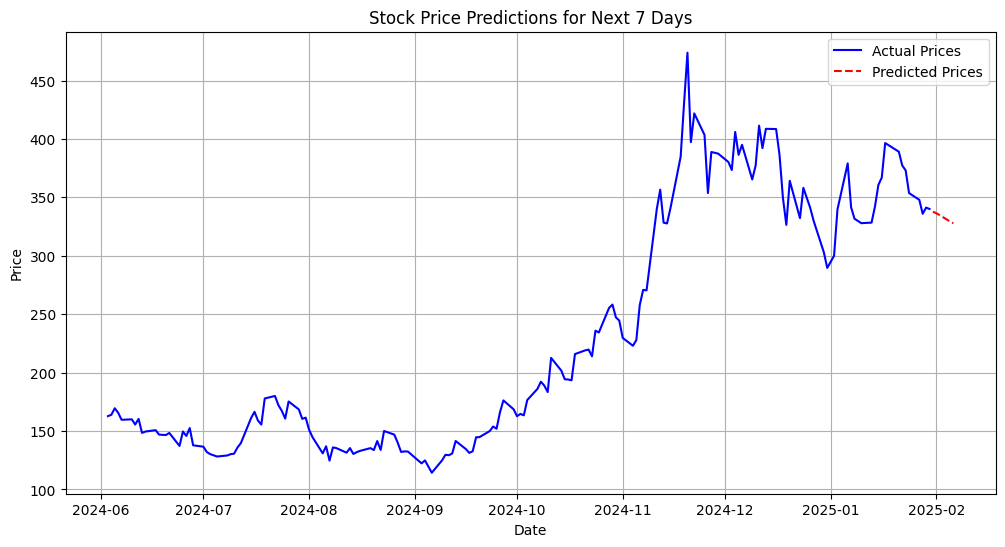

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual Prices', color='blue')
plt.plot(future_df.index, future_df['Predictions'], label='Predicted Prices', color='red', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Predictions for Next 7 Days')
plt.legend()
plt.grid(True)
plt.show()